<a href="https://colab.research.google.com/github/ankesh86/ASPNETMVCStoreApp/blob/main/Experiments/Experiment3_molecule_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
X = pd.read_csv('/content/Exp3_PhysioProperties_features.csv')
y_label = pd.read_csv('/content/label.csv')

In [3]:
print(X.shape)
y = y_label.iloc[:, 1:].copy()
print(y.shape)

(988, 36)
(988, 1)


# **Train-Test split**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [6]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **LR implemetation**

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# calculating score
pred = logistic.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


[[161  11]
 [ 11  15]]
0.8888888888888888
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       172
           1       0.58      0.58      0.58        26

    accuracy                           0.89       198
   macro avg       0.76      0.76      0.76       198
weighted avg       0.89      0.89      0.89       198



# **SMOTE for handling imbalanced data**

- SMOTE (Synthetic Minority Over-sampling Technique): This is a popular oversampling method that generates new samples from the minority class by interpolating between existing minority samples. The goal is to increase the number of minority samples to balance the dataset.
- Tomek links: This is a method for removing noisy samples from the dataset. Tomek links are pairs of samples from different classes that are closest to each other. By removing these samples, the dataset becomes less noisy, and the classification boundaries become clearer.

In [8]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [9]:
#sampling technique to handle imbalanced data
smk = SMOTETomek(sampling_strategy=0.50, random_state=42)

# Fit and resample the training data
X_res, y_res = smk.fit_resample(X_train, y_train)

# Count of number of classes before and after resampling
print("Number of classes before fit: {}".format(Counter(y_train)))
print("Number of classes after fit: {}".format(Counter(y_res)))


Number of classes before fit: Counter({0: 686, 1: 104})
Number of classes after fit: Counter({0: 684, 1: 341})


In [10]:
# If y_train_resampled is a pandas Series or DataFrame, convert it to a numpy array
if isinstance(y_res, (pd.Series, pd.DataFrame)):
    y_res = y_res.values

# If y_train_resampled is a 2D array, flatten it
if y_res.ndim > 1:
    y_res = y_res.flatten()

# Now try to get the distribution
try:
    print("Distribution of classes before SMOTE:")
    unique, counts = np.unique(y_train, return_counts=True)
    for value, count in zip(unique, counts):
        print(f"Class {value}: {count}")
except Exception as e:
    print("Error in getting distribution:", str(e))

try:
    print("Distribution of classes after SMOTE:")
    unique, counts = np.unique(y_res, return_counts=True)
    for value, count in zip(unique, counts):
        print(f"Class {value}: {count}")
except Exception as e:
    print("Error in getting distribution:", str(e))

Distribution of classes before SMOTE:
Class 0: 686
Class 1: 104
Distribution of classes after SMOTE:
Class 0: 684
Class 1: 341


# **LR after SMOTE sampling**

In [11]:
## training with lR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_res, y_res)

# calculating score
y_pred = logistic.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[154  18]
 [  5  21]]
0.8838383838383839
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       172
           1       0.54      0.81      0.65        26

    accuracy                           0.88       198
   macro avg       0.75      0.85      0.79       198
weighted avg       0.91      0.88      0.89       198



# **Decision Tree**

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier()
df.fit(X_train, y_train)

# calculating score
pred = df.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[161  11]
 [ 11  15]]
0.8888888888888888
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       172
           1       0.58      0.58      0.58        26

    accuracy                           0.89       198
   macro avg       0.76      0.76      0.76       198
weighted avg       0.89      0.89      0.89       198



In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier()
df.fit(X_res, y_res)

# calculating score
y_pred = df.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[159  13]
 [  7  19]]
0.898989898989899
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       172
           1       0.59      0.73      0.66        26

    accuracy                           0.90       198
   macro avg       0.78      0.83      0.80       198
weighted avg       0.91      0.90      0.90       198



## **Observation 1** : After SMOTE sampling, the True positive score increases

# **Random-Forest**

In [14]:
# training model using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# calculate score
pred = rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[168   4]
 [  8  18]]
0.9393939393939394
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       172
           1       0.82      0.69      0.75        26

    accuracy                           0.94       198
   macro avg       0.89      0.83      0.86       198
weighted avg       0.94      0.94      0.94       198



In [15]:
# training model using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_res, y_res)

# calculate score
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[166   6]
 [  7  19]]
0.9343434343434344
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       172
           1       0.76      0.73      0.75        26

    accuracy                           0.93       198
   macro avg       0.86      0.85      0.85       198
weighted avg       0.93      0.93      0.93       198



# **KNN implemetation**

0.9582278481012658
[[158  14]
 [  3  23]]
0.9141414141414141
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       172
           1       0.62      0.88      0.73        26

    accuracy                           0.91       198
   macro avg       0.80      0.90      0.84       198
weighted avg       0.93      0.91      0.92       198



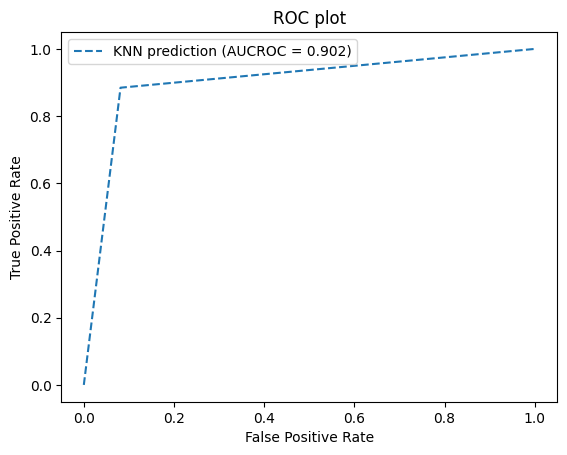

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_res, y_res)

y_predict = model1.predict(X_test)

#calculate score
print(model1.score(X_train, y_train))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#plot AUC-ROC curve
r_auc = roc_auc_score(y_test, y_predict)
r_fpr, r_tpr, _ = roc_curve(y_test, y_predict)

plt.plot(r_fpr, r_tpr, linestyle = '--', label='KNN prediction (AUCROC = %0.3f)' %r_auc)
plt.title('ROC plot')

#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show legend
plt.legend()
plt.show()

0.9164556962025316
[[150  22]
 [  4  22]]
0.8686868686868687
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       172
           1       0.50      0.85      0.63        26

    accuracy                           0.87       198
   macro avg       0.74      0.86      0.77       198
weighted avg       0.91      0.87      0.88       198



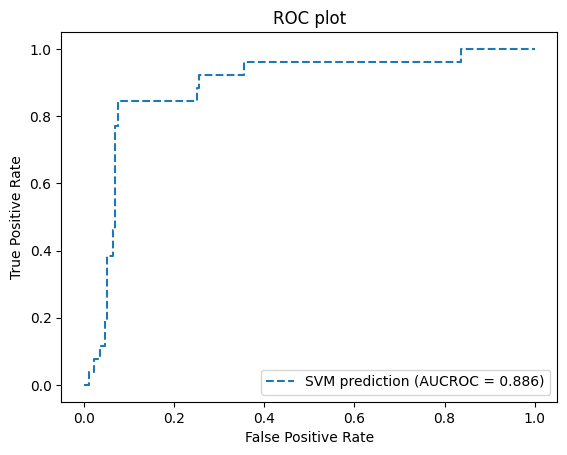

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM model
model2 = svm.SVC(kernel='linear', probability=True)

# Fit the model to the resampled data
model2.fit(X_res, y_res)

# Make predictions on the test set
y_predict = model2.predict(X_test)

# Calculate score
print(model2.score(X_train, y_train))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot AUC-ROC curve
y_pred_proba = model2.predict_proba(X_test)[:, 1]
r_auc = roc_auc_score(y_test, y_pred_proba)
r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(r_fpr, r_tpr, linestyle='--', label='SVM prediction (AUCROC = %0.3f)' % r_auc)
plt.title('ROC plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()
plt.show()

0.9936708860759493
[[165   7]
 [  8  18]]
0.9242424242424242
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       172
           1       0.72      0.69      0.71        26

    accuracy                           0.92       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.92      0.92      0.92       198



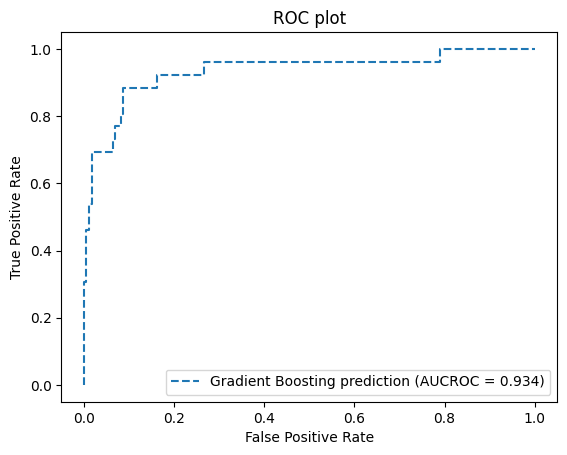

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Gradient Boosting model
model3 = GradientBoostingClassifier()

# Fit the model to the resampled data
model3.fit(X_res, y_res)

# Make predictions on the test set
y_predict = model3.predict(X_test)

# Calculate score
print(model3.score(X_train, y_train)) #significance of this line is to evaluate the performance of the model on the training data. It gives you an idea of how well the model is fitting the training data.
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot AUC-ROC curve
y_pred_proba = model3.predict_proba(X_test)[:, 1]
r_auc = roc_auc_score(y_test, y_pred_proba)
r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Gradient Boosting prediction (AUCROC = %0.3f)' % r_auc)
plt.title('ROC plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()
plt.show()

In [19]:
!pip -q install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [20]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
import matplotlib.pyplot as plt

# Create a CatBoost model
model4 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model4.fit(X_train, y_train)

# Fit the model to the resampled data
model4.fit(X_res, y_res)

# Make predictions on the test set
y_predict = model4.predict(X_test)

# Calculate score
print(model4.score(X_train, y_train))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot AUC-ROC curve
plt.plot(fpr, tpr, linestyle='--', label='CatBoost prediction (AUCROC = %0.3f)' % roc_auc_score(y_test, y_predict))
plt.title('ROC plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()
plt.show()

0:	learn: 0.5791326	total: 70.9ms	remaining: 7.02s
1:	learn: 0.4852539	total: 97.9ms	remaining: 4.8s
2:	learn: 0.4072263	total: 120ms	remaining: 3.89s
3:	learn: 0.3675966	total: 150ms	remaining: 3.61s
4:	learn: 0.3340843	total: 192ms	remaining: 3.65s
5:	learn: 0.2927594	total: 234ms	remaining: 3.66s
6:	learn: 0.2613447	total: 252ms	remaining: 3.35s
7:	learn: 0.2365896	total: 292ms	remaining: 3.36s
8:	learn: 0.2209488	total: 311ms	remaining: 3.15s
9:	learn: 0.2018935	total: 337ms	remaining: 3.03s
10:	learn: 0.1885164	total: 346ms	remaining: 2.8s
11:	learn: 0.1790605	total: 370ms	remaining: 2.71s
12:	learn: 0.1689982	total: 383ms	remaining: 2.56s
13:	learn: 0.1580486	total: 424ms	remaining: 2.61s
14:	learn: 0.1489646	total: 453ms	remaining: 2.57s
15:	learn: 0.1396239	total: 473ms	remaining: 2.48s
16:	learn: 0.1334591	total: 488ms	remaining: 2.38s
17:	learn: 0.1292679	total: 509ms	remaining: 2.32s
18:	learn: 0.1230262	total: 525ms	remaining: 2.24s
19:	learn: 0.1192883	total: 538ms	remaini

NameError: name 'fpr' is not defined

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Define the hyperparameter grid for CatBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [0.1, 1, 5],
    'iterations': [100, 200, 500]
}

# Define the CatBoost model
model = CatBoostClassifier()

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding AUC_ROC score
print("Best parameters:", grid_search.best_params_)
print("Best AUC_ROC score:", grid_search.best_score_)

# Train the model with the best parameters on the entire dataset
best_model = CatBoostClassifier(**grid_search.best_params_)
best_model.fit(X, y)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
print("AUC_ROC score on test set:", roc_auc_score(y_test, y_pred_prob))

Streaming output truncated to the last 5000 lines.
3:	learn: 0.4404262	total: 8.7ms	remaining: 1.08s
4:	learn: 0.4073975	total: 11ms	remaining: 1.08s
5:	learn: 0.3728182	total: 14.3ms	remaining: 1.18s
6:	learn: 0.3574923	total: 15.3ms	remaining: 1.08s
7:	learn: 0.3362842	total: 22.5ms	remaining: 1.39s
8:	learn: 0.3292008	total: 23.2ms	remaining: 1.27s
9:	learn: 0.3036338	total: 27.9ms	remaining: 1.37s
10:	learn: 0.2869749	total: 31.3ms	remaining: 1.39s
11:	learn: 0.2702686	total: 34.8ms	remaining: 1.42s
12:	learn: 0.2611467	total: 38.4ms	remaining: 1.44s
13:	learn: 0.2484277	total: 41.9ms	remaining: 1.45s
14:	learn: 0.2415536	total: 45.3ms	remaining: 1.46s
15:	learn: 0.2338477	total: 48.6ms	remaining: 1.47s
16:	learn: 0.2267525	total: 52ms	remaining: 1.48s
17:	learn: 0.2210436	total: 55.3ms	remaining: 1.48s
18:	learn: 0.2154661	total: 59ms	remaining: 1.49s
19:	learn: 0.2102215	total: 63.5ms	remaining: 1.52s
20:	learn: 0.2053010	total: 67.2ms	remaining: 1.53s
21:	learn: 0.2000123	total:

0:	learn: 0.5773257	total: 3.46ms	remaining: 1.73s
1:	learn: 0.4964409	total: 4.43ms	remaining: 1.1s
2:	learn: 0.4524579	total: 6.06ms	remaining: 1s
3:	learn: 0.4058340	total: 7.72ms	remaining: 957ms
4:	learn: 0.3519741	total: 8.99ms	remaining: 890ms
5:	learn: 0.3264530	total: 10.2ms	remaining: 843ms
6:	learn: 0.3030559	total: 11.5ms	remaining: 808ms
7:	learn: 0.2874894	total: 12.8ms	remaining: 787ms
8:	learn: 0.2684665	total: 14.1ms	remaining: 769ms
9:	learn: 0.2528394	total: 15.7ms	remaining: 768ms
10:	learn: 0.2441539	total: 17.2ms	remaining: 764ms
11:	learn: 0.2329158	total: 18.8ms	remaining: 764ms
12:	learn: 0.2284859	total: 20.1ms	remaining: 754ms
13:	learn: 0.2217010	total: 21.5ms	remaining: 747ms
14:	learn: 0.2141128	total: 22.8ms	remaining: 736ms
15:	learn: 0.2098185	total: 24.2ms	remaining: 733ms
16:	learn: 0.2062218	total: 25.7ms	remaining: 729ms
17:	learn: 0.2014836	total: 26.9ms	remaining: 721ms
18:	learn: 0.1969942	total: 28.2ms	remaining: 713ms
19:	learn: 0.1939019	total

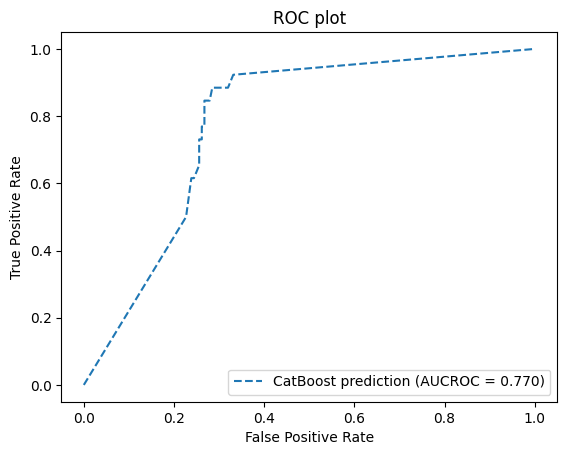

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
import matplotlib.pyplot as plt

# Create a CatBoost model
#f1 - Best parameters: {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
#aucroc - (depth=7, iterations=100, l2_leaf_reg=5, learning_rate=0.1)
model4 = CatBoostClassifier(depth=5, iterations=500, l2_leaf_reg=1, learning_rate=0.1)
model4.fit(X_train, y_train)

# Fit the model to the resampled data
model4.fit(X_res, y_res)

# Make predictions on the test set
y_predict = model4.predict(X_test)

# Calculate score
print(model4.score(X_train, y_train))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot AUC-ROC curve
plt.plot(fpr, tpr, linestyle='--', label='CatBoost prediction (AUCROC = %0.3f)' % roc_auc_score(y_test, y_predict))
plt.title('ROC plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()
plt.show()

- roc_auc: Area under the Receiver Operating Characteristic curve (AUC-ROC). This is a popular metric for binary classification problems, especially when classes are imbalanced.
accuracy: Accuracy score, which is the proportion of correctly classified samples.
- f1: F1 score, which is the harmonic mean of precision and recall. This is a good metric when you want to balance between precision and recall.
precision: Precision score, which is the ratio of true positives to the sum of true positives and false positives.
- recall: Recall score, which is the ratio of true positives to the sum of true positives and false negatives.
mean_squared_error: Mean squared error (MSE) for regression problems.
- mean_absolute_error: Mean absolute error (MAE) for regression problems.
- r2: R-squared (coefficient of determination) for regression problems.
- log_loss: Log loss (cross-entropy loss) for classification problems.
- neg_mean_squared_error: Negative mean squared error (NMSE) for regression problems.

\n You can also use other metrics specific to your problem, such as:

- average_precision: Average precision score for binary classification problems.
- brier_score_loss: Brier score loss for binary classification problems.
- cohen_kappa_score: Cohen's kappa score for classification problems.
- explained_variance: Explained variance score for regression problems.
- max_error: Maximum error for regression problems.

In [ ]:
import sklearn.metrics

scorer_names = sklearn.metrics.get_scorer_names()
print(scorer_names)


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

For a binary classification problem with an imbalanced dataset where the true label is only 10% of the false label, standard accuracy is not a good metric to use. Here are some better options from the sklearn metrics list you provided:

- **F1 score: 'f1'**- This is a good balance between precision and recall, which is important for imbalanced datasets.
- **ROC AUC: 'roc_auc'** - This measures the model's ability to distinguish between classes and is insensitive to class imbalance.
- **Average Precision: 'average_precision'**- This summarizes the precision-recall curve and works well for imbalanced datasets.
- **Matthews Correlation Coefficient: 'matthews_corrcoef'**- This metric provides a balanced measure for binary classification problems, even with imbalanced datasets.
- **Balanced Accuracy: 'balanced_accuracy'** - This is the average of recall obtained on each class, which helps when dealing with imbalanced datasets.

# **Cross-Validation Accuracy and F1 -Scoring**

## **Logistic Regression**

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the Logistic Regression model
    logistic = LogisticRegression()

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(logistic, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(logistic, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(logistic, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    logistic.fit(X_train, y_train)

    # Validate the model on the test set
    pred = logistic.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)


Cross-validation scores (cv=5): [0.88292683 0.91219512 0.86341463 0.91219512 0.84878049]
Mean cross-validation accuracy (cv=5): 0.8839024390243904
Mean cross-validation F1 score (cv=5): 0.8693532848659029
Cross-validation scores (cv=10): [0.86407767 0.9223301  0.9223301  0.89320388 0.85436893 0.88235294
 0.91176471 0.89215686 0.91176471 0.84313725]
Mean cross-validation accuracy (cv=10): 0.8897487150199886
Mean cross-validation F1 score (cv=10): 0.8759152113880404
Confusion Matrix (external validation):
[[154  18]
 [  5  21]]
Accuracy Score (external validation): 0.8838383838383839
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       172
           1       0.54      0.81      0.65        26

    accuracy                           0.88       198
   macro avg       0.75      0.85      0.79       198
weighted avg       0.91      0.88      0.89       198

{'Accuracy_5': 0.8839024390243904, 'F1_

## **Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the Decision Tree model
    decision_tree = DecisionTreeClassifier()

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    decision_tree.fit(X_train, y_train)

    # Validate the model on the test set
    pred = decision_tree.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)


Cross-validation scores (cv=5): [0.93170732 0.92682927 0.96097561 0.95121951 0.96097561]
Mean cross-validation accuracy (cv=5): 0.9463414634146341
Mean cross-validation F1 score (cv=5): 0.9417474647440374
Cross-validation scores (cv=10): [0.91262136 0.90291262 0.90291262 0.93203883 0.95145631 0.97058824
 0.93137255 0.94117647 1.         0.92156863]
Mean cross-validation accuracy (cv=10): 0.9366647629925758
Mean cross-validation F1 score (cv=10): 0.9365333031268721
Confusion Matrix (external validation):
[[160  12]
 [  7  19]]
Accuracy Score (external validation): 0.9040404040404041
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       172
           1       0.61      0.73      0.67        26

    accuracy                           0.90       198
   macro avg       0.79      0.83      0.81       198
weighted avg       0.91      0.90      0.91       198

{'Accuracy_5': 0.9463414634146341, 'F1_

## **K-Nearest Neighbour**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the KNeighborsClassifier model with 3 neighbors
    knn = KNeighborsClassifier(n_neighbors=3)

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    knn.fit(X_train, y_train)

    # Validate the model on the test set
    pred = knn.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage (assuming X_res, X_test, y_res, and y_test are defined)
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)


Cross-validation scores (cv=5): [0.95121951 0.91219512 0.97073171 0.94146341 0.92682927]
Mean cross-validation accuracy (cv=5): 0.9404878048780487
Mean cross-validation F1 score (cv=5): 0.9355704410659657
Cross-validation scores (cv=10): [0.96116505 0.94174757 0.93203883 0.90291262 0.97087379 0.97058824
 0.94117647 0.94117647 0.93137255 0.92156863]
Mean cross-validation accuracy (cv=10): 0.9414620217018846
Mean cross-validation F1 score (cv=10): 0.9365594500403718
Confusion Matrix (external validation):
[[158  14]
 [  3  23]]
Accuracy Score (external validation): 0.9141414141414141
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       172
           1       0.62      0.88      0.73        26

    accuracy                           0.91       198
   macro avg       0.80      0.90      0.84       198
weighted avg       0.93      0.91      0.92       198

{'Accuracy_5': 0.9404878048780487, 'F1_

## **Support-Vector Machines**

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the SVM model
    svm = SVC(kernel='linear')  # You can choose other kernels such as 'rbf', 'poly', etc.

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    svm.fit(X_train, y_train)

    # Validate the model on the test set
    pred = svm.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage (assuming X_res, X_test, y_res, and y_test are defined)
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)

Cross-validation scores (cv=5): [0.92195122 0.90243902 0.89268293 0.92682927 0.89268293]
Mean cross-validation accuracy (cv=5): 0.9073170731707318
Mean cross-validation F1 score (cv=5): 0.8986329860224789
Cross-validation scores (cv=10): [0.90291262 0.94174757 0.94174757 0.88349515 0.88349515 0.90196078
 0.93137255 0.89215686 0.91176471 0.88235294]
Mean cross-validation accuracy (cv=10): 0.9073005901389684
Mean cross-validation F1 score (cv=10): 0.8985304881616957
Confusion Matrix (external validation):
[[150  22]
 [  4  22]]
Accuracy Score (external validation): 0.8686868686868687
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       172
           1       0.50      0.85      0.63        26

    accuracy                           0.87       198
   macro avg       0.74      0.86      0.77       198
weighted avg       0.91      0.87      0.88       198

{'Accuracy_5': 0.9073170731707318, 'F1_

## **Random-Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the Random Forest model with default parameters
    rf = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features='auto',
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=False,
                                n_jobs=None,
                                random_state=None,
                                verbose=0,
                                warm_start=False,
                                class_weight=None)

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    rf.fit(X_train, y_train)

    # Validate the model on the test set
    pred = rf.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage (assuming X_res, X_test, y_res, and y_test are defined)
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-validation scores (cv=5): [0.93658537 0.94634146 0.9804878  0.95609756 0.99512195]
Mean cross-validation accuracy (cv=5): 0.9629268292682926
Mean cross-validation F1 score (cv=5): 0.9590414661978576
Cross-validation scores (cv=10): [0.95145631 0.90291262 0.95145631 0.94174757 0.97087379 0.98039216
 0.96078431 0.96078431 1.         0.99019608]
Mean cross-validation accuracy (cv=10): 0.9610603464686844
Mean cross-validation F1 score (cv=10): 0.9576646579124143
Confusion Matrix (external validation):
[[166   6]
 [  7  19]]
Accuracy Score (external validation): 0.9343434343434344
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       172
           1       0.76      0.73      0.75        26

    accuracy                           0.93       198
   macro avg       0.86      0.85      0.85       198
weighted avg       0.93      0.93      0.93       198

{'Accuracy_5': 0.9629268292682926, 'F1_

## **Gradient Boosting**

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the Gradient Boosting model with default parameters
    gbc = GradientBoostingClassifier(
        loss='deviance',
        learning_rate=0.1,
        n_estimators=100,
        subsample=1.0,
        criterion='friedman_mse',
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_depth=3,
        min_impurity_decrease=0.0,
        init=None,
        random_state=None,
        max_features=None,
        verbose=0,
        max_leaf_nodes=None,
        warm_start=False,
        validation_fraction=0.1,
        n_iter_no_change=None,
        tol=0.0001,
        ccp_alpha=0.0
    )

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    gbc.fit(X_train, y_train)

    # Validate the model on the test set
    pred = gbc.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage (assuming X_res, X_test, y_res, and y_test are defined)
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

Cross-validation scores (cv=5): [0.92682927 0.94146341 0.99512195 0.95121951 0.98536585]
Mean cross-validation accuracy (cv=5): 0.96
Mean cross-validation F1 score (cv=5): 0.9547382346168265
Cross-validation scores (cv=10): [0.95145631 0.91262136 0.94174757 0.94174757 0.99029126 0.99019608
 0.98039216 0.93137255 0.99019608 0.98039216]
Mean cross-validation accuracy (cv=10): 0.9610413097277746
Mean cross-validation F1 score (cv=10): 0.9557860397775254
Confusion Matrix (external validation):
[[165   7]
 [  8  18]]
Accuracy Score (external validation): 0.9242424242424242
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       172
           1       0.72      0.69      0.71        26

    accuracy                           0.92       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.92      0.92      0.92       198

{'Accuracy_5': 0.96, 'F1_5': 0.9547382346168265, 'Acc

## **Catboost Classifier**

In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test):
    # Create the CatBoost model with default parameters
    catboost = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        loss_function='Logloss',
        verbose=0
    )

    # Perform cross-validation with cv=5
    cv_5_scores = cross_val_score(catboost, X_train, y_train, cv=5, scoring='accuracy')
    cv_5_f1_scores = cross_val_score(catboost, X_train, y_train, cv=5, scoring='f1_macro')

    # Perform cross-validation with cv=10
    cv_10_scores = cross_val_score(catboost, X_train, y_train, cv=10, scoring='accuracy')
    cv_10_f1_scores = cross_val_score(catboost, X_train, y_train, cv=10, scoring='f1_macro')

    # Train the model on the entire training set
    catboost.fit(X_train, y_train)

    # Validate the model on the test set
    pred = catboost.predict(X_test)
    accuracy_ext_validation = accuracy_score(y_test, pred)
    f1_ext_validation = f1_score(y_test, pred, average='macro')

    # Print the results
    print("Cross-validation scores (cv=5):", cv_5_scores)
    print("Mean cross-validation accuracy (cv=5):", cv_5_scores.mean())
    print("Mean cross-validation F1 score (cv=5):", cv_5_f1_scores.mean())

    print("Cross-validation scores (cv=10):", cv_10_scores)
    print("Mean cross-validation accuracy (cv=10):", cv_10_scores.mean())
    print("Mean cross-validation F1 score (cv=10):", cv_10_f1_scores.mean())

    print("Confusion Matrix (external validation):")
    print(confusion_matrix(y_test, pred))
    print("Accuracy Score (external validation):", accuracy_ext_validation)
    print("Classification Report (external validation):")
    print(classification_report(y_test, pred))

    # Return the results as a dictionary
    results = {
        'Accuracy_5': cv_5_scores.mean(),
        'F1_5': cv_5_f1_scores.mean(),
        'Accuracy_10': cv_10_scores.mean(),
        'F1_10': cv_10_f1_scores.mean(),
        'Accuracy_ext_validation': accuracy_ext_validation,
        'F1_ext_validation': f1_ext_validation
    }

    return results

# Example usage (assuming X_res, X_test, y_res, and y_test are defined)
results = evaluate_model(X_res, X_test, y_res, y_test)
print(results)


Cross-validation scores (cv=5): [0.93658537 0.94634146 0.98536585 0.96585366 0.99512195]
Mean cross-validation accuracy (cv=5): 0.9658536585365853
Mean cross-validation F1 score (cv=5): 0.9614850262377729
Cross-validation scores (cv=10): [0.94174757 0.91262136 0.96116505 0.94174757 0.98058252 0.99019608
 0.98039216 0.97058824 0.99019608 0.99019608]
Mean cross-validation accuracy (cv=10): 0.9659432705120883
Mean cross-validation F1 score (cv=10): 0.9613023829340335
Confusion Matrix (external validation):
[[166   6]
 [  6  20]]
Accuracy Score (external validation): 0.9393939393939394
Classification Report (external validation):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       172
           1       0.77      0.77      0.77        26

    accuracy                           0.94       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.94      0.94      0.94       198

{'Accuracy_5': 0.9658536585365853, 'F1_

# **Auc-Roc Plot + Evaluation meterics(Accuracy, Precision, Recall, F1)**

Model: Logistic Regression
Confusion Matrix:
[[161  11]
 [ 11  15]]
Accuracy Score: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       172
           1       0.58      0.58      0.58        26

    accuracy                           0.89       198
   macro avg       0.76      0.76      0.76       198
weighted avg       0.89      0.89      0.89       198

Model: Decision Tree
Confusion Matrix:
[[164   8]
 [ 12  14]]
Accuracy Score: 0.898989898989899
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.64      0.54      0.58        26

    accuracy                           0.90       198
   macro avg       0.78      0.75      0.76       198
weighted avg       0.89      0.90      0.90       198

Model: K-Nearest Neighbors
Confusion Matrix:
[[164   8]
 [  7  19]]
Accuracy Score: 0.924242424242424

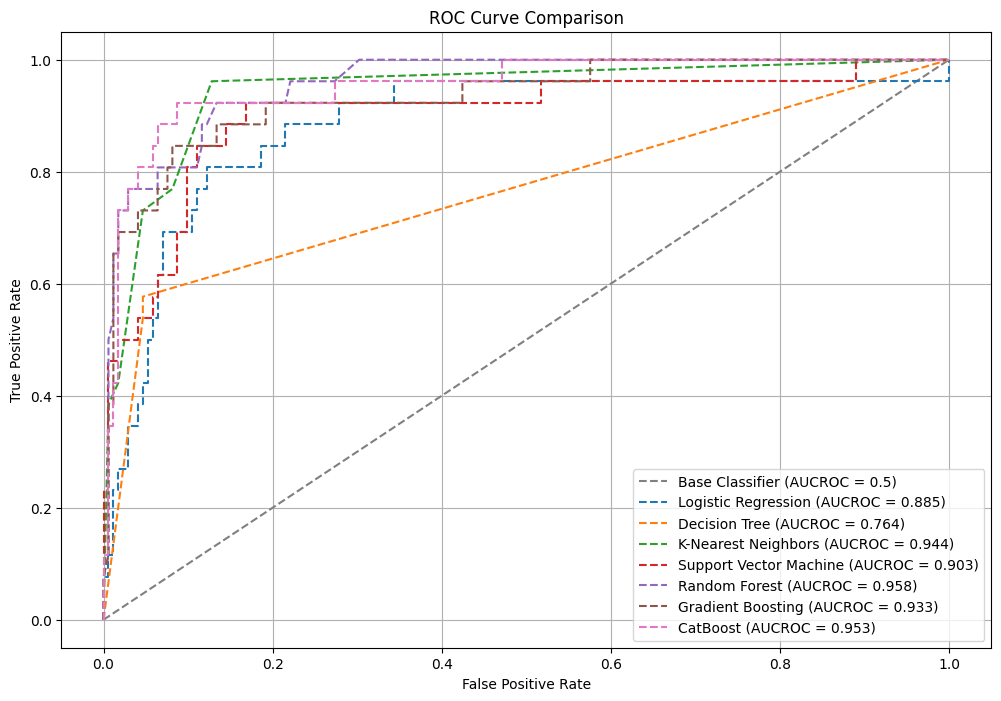

{'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting', 'CatBoost'], 'Accuracy': [0.8888888888888888, 0.898989898989899, 0.9242424242424242, 0.9141414141414141, 0.9393939393939394, 0.9292929292929293, 0.9494949494949495], 'Precision': [0.756484794275492, 0.7840909090909091, 0.8313840155945419, 0.8617486338797815, 0.8757183908045977, 0.8520114942528736, 0.9119318181818181], 'Recall': [0.756484794275492, 0.7459749552772809, 0.842128801431127, 0.7220483005366727, 0.8508497316636852, 0.82871198568873, 0.8566636851520573], 'F1 Score': [0.756484794275492, 0.7629310344827587, 0.8366246768249077, 0.7687392648574374, 0.8626589595375722, 0.8397687861271675, 0.8814655172413792], 'AUC-ROC': [0.8848389982110911, 0.7643112701252236, 0.9443202146690519, 0.903175313059034, 0.9578488372093024, 0.9334749552772809, 0.9530411449016101]}


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def evaluate_and_plot_roc(X_train, X_test, y_train, y_test):
    # Define models with default parameters
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'CatBoost': CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=6, loss_function='Logloss', verbose=0)
    }

    # Create a dictionary to hold metrics
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'AUC-ROC': []
    }

    # Plot ROC curves
    plt.figure(figsize=(12, 8))

    # Plot benchmark line for random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Base Classifier (AUCROC = 0.5)')

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_predict = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_predict)
        precision = precision_score(y_test, y_predict, average='macro')
        recall = recall_score(y_test, y_predict, average='macro')
        f1 = f1_score(y_test, y_predict, average='macro')
        auc_roc = roc_auc_score(y_test, y_pred_proba)

        # Print metrics
        print(f"Model: {model_name}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_predict))
        print("Accuracy Score:", accuracy)
        print("Classification Report:")
        print(classification_report(y_test, y_predict))

        # Append metrics
        metrics['Model'].append(model_name)
        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1 Score'].append(f1)
        metrics['AUC-ROC'].append(auc_roc)

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} (AUCROC = {auc_roc:.3f})')

    # Plot settings
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

    return metrics

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
metrics = evaluate_and_plot_roc(X_train, X_test, y_train, y_test)
print(metrics)


In [29]:
pd.DataFrame(metrics)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.888889,0.756485,0.756485,0.756485,0.884839
1,Decision Tree,0.898990,0.784091,0.745975,0.762931,0.764311
2,K-Nearest Neighbors,0.924242,0.831384,0.842129,0.836625,0.944320
3,Support Vector Machine,0.914141,0.861749,0.722048,0.768739,0.903175
4,Random Forest,0.939394,0.875718,0.850850,0.862659,0.957849
5,Gradient Boosting,0.929293,0.852011,0.828712,0.839769,0.933475
6,CatBoost,0.949495,0.911932,0.856664,0.881466,0.953041
